In [1]:
import pandas as pd
import numpy as np
import os
import random as rd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import random
import sklearn

#change working directory
#os.chdir("C:/Users/jake.wagner/OneDrive - Washington State University (email.wsu.edu)/WSU_Econ/Research/TRG/PacTrans/Brandon TRG")
os.chdir(r'C:\Users\brand/OneDrive - Washington State University (email.wsu.edu)/Brandon')
#set pandas defaults for number of rows and columns to display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)

#read in data
#df = pd.read_csv("transitCleaned.csv", parse_dates=['Date'])
#df = pd.read_csv("stopYearDayHour.csv", parse_dates=['Date'])
df = pd.read_csv("stopYearDay.csv", parse_dates=['Date'])
df = df.loc[(df['DOW_Sunday'] != 1) & (df['DOW_Saturday'] != 1)].reset_index(drop = True)
df = df.loc[(df['Year']) == 2019].reset_index(drop = True)
df = df.drop(columns = ['stop_lat','stop_lng','missingLoc','googleLat','googleLng','counter','wlkscr_snapped_lat','wlkscr_snapped_lon','incomePovertyRatio','Year'])

outliers = [19035]
df = df.drop(outliers).reset_index(drop = True)

In [2]:
df = df.drop(columns = ['Hour','morning','afternoon','evening'])

In [3]:
df = df.rename(columns={'HourlyDryBulbTemperature':'DailyDryBulbTemperature','HourlyPrecipitation':'DailyPrecipitation','HourlyWindSpeed':'DailyAvgWindSpeed'})

In [4]:
df

,stop_name,Date,DOY,DOW_num,Month,Ons,Offs,Week,DOM,GEOID,income,population,degreePopOver25,enrolledOver3,ownerNoVehicle,renterNoVehicle,owner,renter,employed,unemployed,labor_frc,med_age,med_house_val,walkscore,bikescore,stopRouteVehicleFreq,stopRouteFreq,stopFreq,Shelter,Simme Seat,busTimeAftOriginChinook,busDistAftOriginChinook,driveTimeAftOriginChinook,driveDistAftOriginChinook,busTimeAftDestChinook,busDistAftDestChinook,driveTimeAftDestChinook,driveDistAftDestChinook,busTimeMornOriginChinook,busDistMornOriginChinook,driveTimeMornOriginChinook,driveDistMornOriginChinook,busTimeMornDestChinook,busDistMornDestChinook,driveTimeMornDestChinook,driveDistMornDestChinook,busTimeAftOriginCUB,busDistAftOriginCUB,driveTimeAftOriginCUB,driveDistAftOriginCUB,busTimeAftDestCUB,busDistAftDestCUB,driveTimeAftDestCUB,driveDistAftDestCUB,busTimeMornOriginCUB,busDistMornOriginCUB,driveTimeMornOriginCUB,driveDistMornOriginCUB,busTimeMornDestCUB,busDistMornDestCUB,driveTimeMornDestCUB,driveDistMornDestCUB,busTimeAftOriginSpark,busDistAftOriginSpark,driveTimeAftOriginSpark,driveDistAftOriginSpark,busTimeAftDestSpark,busDistAftDestSpark,driveTimeAftDestSpark,driveDistAftDestSpark,busTimeMornOriginSpark,busDistMornOriginSpark,driveTimeMornOriginSpark,driveDistMornOriginSpark,busTimeMornDestSpark,busDistMornDestSpark,driveTimeMornDestSpark,driveDistMornDestSpark,busTimeAftOriginSloan,busDistAftOriginSloan,driveTimeAftOriginSloan,driveDistAftOriginSloan,busTimeAftDestSloan,busDistAftDestSloan,driveTimeAftDestSloan,driveDistAftDestSloan,busTimeMornOriginSloan,busDistMornOriginSloan,driveTimeMornOriginSloan,driveDistMornOriginSloan,busTimeMornDestSloan,busDistMornDestSloan,driveTimeMornDestSloan,driveDistMornDestSloan,busTimeAftOriginBeasley,busDistAftOriginBeasley,driveTimeAftOriginBeasley,driveDistAftOriginBeasley,busTimeAftDestBeasley,busDistAftDestBeasley,driveTimeAftDestBeasley,driveDistAftDestBeasley,busTimeMornOriginBeasley,busDistMornOriginBeasley,driveTimeMornOriginBeasley,driveDistMornOriginBeasley,busTimeMornDestBeasley,busDistMornDestBeasley,driveTimeMornDestBeasley,driveDistMornDestBeasley,busTimeAftOriginVogel,busDistAftOriginVogel,driveTimeAftOriginVogel,driveDistAftOriginVogel,busTimeAftDestVogel,busDistAftDestVogel,driveTimeAftDestVogel,driveDistAftDestVogel,busTimeMornOriginVogel,busDistMornOriginVogel,driveTimeMornOriginVogel,driveDistMornOriginVogel,busTimeMornDestVogel,busDistMornDestVogel,driveTimeMornDestVogel,driveDistMornDestVogel,busTimeAftOriginWalmart,busDistAftOriginWalmart,driveTimeAftOriginWalmart,driveDistAftOriginWalmart,busTimeAftDestWalmart,busDistAftDestWalmart,driveTimeAftDestWalmart,driveDistAftDestWalmart,busTimeMornOriginWalmart,busDistMornOriginWalmart,driveTimeMornOriginWalmart,driveDistMornOriginWalmart,busTimeMornDestWalmart,busDistMornDestWalmart,driveTimeMornDestWalmart,driveDistMornDestWalmart,busTimeAftOriginSEL,busDistAftOriginSEL,driveTimeAftOriginSEL,driveDistAftOriginSEL,busTimeAftDestSEL,busDistAftDestSEL,driveTimeAftDestSEL,driveDistAftDestSEL,busTimeMornOriginSEL,busDistMornOriginSEL,driveTimeMornOriginSEL,driveDistMornOriginSEL,busTimeMornDestSEL,busDistMornDestSEL,driveTimeMornDestSEL,driveDistMornDestSEL,busTimeAftOriginHighschool,busDistAftOriginHighschool,driveTimeAftOriginHighschool,driveDistAftOriginHighschool,busTimeAftDestHighschool,busDistAftDestHighschool,driveTimeAftDestHighschool,driveDistAftDestHighschool,busTimeMornOriginHighschool,busDistMornOriginHighschool,driveTimeMornOriginHighschool,driveDistMornOriginHighschool,busTimeMornDestHighschool,busDistMornDestHighschool,driveTimeMornDestHighschool,driveDistMornDestHighschool,busTimeAftOriginGrandMain,busDistAftOriginGrandMain,driveTimeAftOriginGrandMain,driveDistAftOriginGrandMain,busTimeAftDestGrandMain,busDistAftDestGrandMain,driveTimeAftDestGrandMain,driveDistAftDestGrandMain,busTimeMornOriginGrandMain,busDistMornOriginGrandMain,driveTimeMornOriginGrandMain,driveDistMornOriginGrandMain,busTimeMornDestGrandMain,busDistMornDestGra

In [5]:
from sklearn.model_selection import GroupShuffleSplit

# seed = rd.randint(0,1000000) #set the seed randomly, but then hold it constant: 295183
# np.savetxt('seed.csv', [seed]) #this will ensure that we are working on the same split each time
seed = int(np.loadtxt('seed.csv'))

X = df.drop(columns=['Ons','Offs'])
y = df['Ons'] + df['Offs']
train_inds, test_inds = next(GroupShuffleSplit(test_size=.2, random_state=seed).split(X, y, df['stop_name']))
xTrain, xTest, yTrain, yTest = X.loc[train_inds], X.loc[test_inds], y.loc[train_inds], y.loc[test_inds]
#xTrain

11946

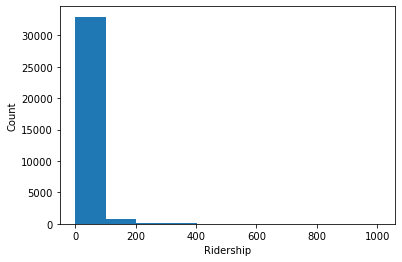

In [8]:
import matplotlib.pyplot as plt
#Plot distribution of Ons
breaks = [0,1,2,3,4,5,10,15,25,30,35,40,45,50,55,60,65,70,75,80,85,90]
rid = df['Ons'] + df['Offs']
plt.hist(rid)
plt.ylabel('Count')
plt.xlabel('Ridership')
(rid == 0).sum()
#plt.savefig('BoardingsCount.png',bbox_inches='tight')

In [7]:
halt

NameError: name 'halt' is not defined

In [ ]:
#exploratory analysis, histograms
# for var in xTrain.drop(['stop_name'],axis=1):
#     fig, ax = plt.subplots(figsize=(8,5))
#     ax.hist(xTrain[var], bins=30)
#     ax.set_ylabel(var)
#     plt.show()


In [ ]:
#scatterplots
# for var in xTrain.drop(['stop_name'],axis=1):
#     fig, ax = plt.subplots(figsize=(10,6))
#     ax.scatter(xTrain[var], yTrain)
#     ax.set_xlabel(var)
#     ax.set_ylabel('Ons')
#     plt.show()

In [ ]:
#write a function that does all of our feature generation
#this will be called within the following pipelines
from sklearn import preprocessing 
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPRegressor
from catboost import Pool, CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from skopt import BayesSearchCV
from skopt import gp_minimize # Bayesian optimization using Gaussia
from skopt.space import Real, Categorical, Integer
from sklearn.model_selection import GroupKFold
from sklearn.feature_selection import SelectFromModel
from numpy import asarray
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
#break these into two stages, we need a clean stage for linear regression (with no feature generation)
class clean(BaseEstimator, TransformerMixin):
    #Class Constructor 
#     def __init__(self, training):
#         self.training = training
    def __init__(self):
        pass
        
    #Return self nothing else to do here    
    def fit(self, X, y = None):
        return self
    
    def transform(self, X):
        
        #drop stop_name and date. ffill the NA values, remove first row since ffill cannot fill first NA
        xCleaned = X[X.columns[2:]]
        xCleaned = xCleaned.ffill()
        xCleaned = xCleaned.fillna(0)
#         xCleaned = sm.add_constant(xCleaned)
        #xCleaned = xCleaned.fillna(value=xCleaned.mean())
        #to address later: group by stop and/or route to fill means? forward fill?  
        #xCleaned = xCleaned.drop(['true_lat','true_lng'],axis = 1)
        return xCleaned
    
class features(BaseEstimator, TransformerMixin):
    #Class Constructor 
#     def __init__(self, training):
#         self.training = training
    def __init__(self):
        pass
        
    #Return self nothing else to do here    
    def fit(self, X, y = None):
        return self
    
    def transform(self, X):
        #any addditional cleaning, scaling, etc., i.e. convert strings to categorical variables (one hot coding?), missing values (mode, median, mean, flag), reliability metric
        xFeatures = clean().transform(X).reset_index(drop=True) #run the cleaning function, then add features
        
        #define vars to interact and square
        start = 7
        stop = 20
        X1 = xFeatures[xFeatures.columns[start:stop]]
        X1.fillna(0)
        
        #feature df into array
        X1 = asarray(X1)
        np.nan_to_num(X1, copy=False)
        
        #define function, fit function to generate feature array, get names for feature array
        poly= PolynomialFeatures(include_bias = False)
        poly_feat = poly.fit_transform(X1)
        poly_feat_names = poly.get_feature_names(xFeatures[xFeatures.columns[start:stop]].columns)
        
        #array into dataframe, add names
        poly_feat_df = pd.DataFrame(poly_feat)
        poly_feat_df.columns = poly_feat_names
        #remove constants (copy of variables included in start-stop) and merge
        poly_feat_df = poly_feat_df.drop(poly_feat_df.iloc[:,:int(stop-start)], axis = 1)
        
        
        
        xFeatures = xFeatures.merge(poly_feat_df, left_index = True, right_index = True)
        #poly_feat_df = poly_feat_df.drop(poly_feat_df.iloc[:,:int(stop-start)], axis = 1).merge(X, left_index = True, right_index = True)
        #xFeatures = poly_feat_df
#         scaler = StandardScaler(copy = False)
#         scaler.fit(xFeatures)
#         scaled = scaler.transform(xFeatures)

#         scaled_df = pd.DataFrame(scaled)
#         scaled_df.columns = xFeatures.columns
        
        
        return xFeatures

    



In [ ]:
#get train csv
#pd.DataFrame(yTrain).merge(clean().transform(xTrain),left_index=True,right_index=True).rename(columns={0:'ridership'}).to_csv('trainCleaned.csv',index=False)
#get test csv 
#pd.DataFrame(yTest).merge(clean().transform(xTest),left_index=True,right_index=True).rename(columns={0:'ridership'}).to_csv('testCleaned.csv',index=False)
#features().transform(xTrain)

In [ ]:
#traindaily csv
pd.DataFrame(yTrain).merge(clean().transform(xTrain),left_index=True,right_index=True).rename(columns={0:'ridership'}).to_csv('dailytrainCleaned.csv',index=False)
#testdaily csv
pd.DataFrame(yTest).merge(clean().transform(xTest),left_index=True,right_index=True).rename(columns={0:'ridership'}).to_csv('dailytestCleaned.csv',index=False)

In [ ]:
features().transform(xTrain)

In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler(copy = False)
# scaler.fit(clean().transform(xTrain))
# scaled = scaler.transform(clean().transform(xTrain))

# scaled_df = pd.DataFrame(scaled)
# scaled_df.columns = clean().transform(xTrain).columns
# scaled_df
# scaled_data_df = pd.DataFrame(scaled_data)
# scaled_data_df
#scaled_names = scaler.get_feature_names_out(xTrain.columns)

In [ ]:
#features().transform(xTrain)

In [ ]:
# Important metrics for testing/optimization
# median absolute percentage error
# doesn't make sense with zeroes
def mape(predicted, actual):
    diff = predicted-actual
    diffRatio = diff/actual
    absPercError = abs(diffRatio)
    return 100*absPercError.median()
#average absolute percentage error
def aape(predicted, actual):
    diff = predicted-actual
    diffRatio = diff/actual
    absPercError = abs(diffRatio)
    return 100*absPercError.mean()

from time import time
from scipy.stats import randint, uniform, norm
# Utility function to report best scores
def report(results, n_top=20):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(np.array(results['rank_test_score']) == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
    #need to make a ranking
    n=0
    for i in results['rank_test_score']:
        if i==1:
            top=n
        n=n+1
    return top

#make some random layer architecture for neural net
def dist(n):
    array = []
    for i in range(n):
        array.append(round(min(np.random.lognormal(3,1),250)))
    return array
layers=[]
for i in range(100000):
    layers.append(dist(1)) #one layer with random sizes
    layers.append(dist(2)) #two layers with random sizes
    layers.append(dist(3)) #three layers with random sizes
    layers.append(dist(4)) #four layers with random sizes
    layers.append(dist(5)) #five layers with random sizes
    layers.append(dist(6)) #six layers with random sizes
    layers.append(dist(10)) #ten layers with random sizes

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
model = Pipeline([('clean', clean()),('est', LinearRegression())])
model.fit(xTrain, yTrain)

inSample = model.predict(xTrain)
outSample = model.predict(xTest)

# The mean squared error
print("Mean squared error (in sample): %.2f"
    % mean_squared_error(yTrain, inSample))
#Explained variance score: 1 is perfect prediction
print('R-square (in sample): %.2f' % r2_score(yTrain, inSample))
print('Avg abs %% error (in sample): %.2f' % aape(yTrain, inSample))
print('Med abs %% error (in sample): %.2f' % mape(yTrain, inSample))
print()
print("Mean squared error (out of sample): %.2f"
    % mean_squared_error(yTest, outSample))
print('R-square (out of sample): %.2f' % r2_score(yTest, outSample))
print('Avg %% error (out of sample): %.2f' % aape(yTest, outSample))
print('Med %% error (out of sample): %.2f' % mape(yTest, outSample))


In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
### importance = bayes_search.best_estimator_['est'].get_feature_importance()
coef = model['est'].coef_
columns = clean().transform(xTrain).columns
arr= pd.DataFrame(coef, columns).sort_values(0,ascending=True)
ax.barh(np.append(arr.index[:15],arr.index[-15:]),np.append(arr[0][:15],arr[0][-15:]))
ax.barh(arr.index[:15],arr[0][:15],color='red')
ax.barh(arr.index[-15:],arr[0][-15:],color='blue')
ax.set_xlabel('coefficient estimates')
ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.show()

In [ ]:
#xTrain.iloc[:, 2:34]
#xTrain.iloc[:,306:352]
# xTrainZIP = pd.concat([xTrain.iloc[:, :34], xTrain.iloc[:,334:341]], axis=1)
# xTrainZIP = xTrainZIP.drop(columns = ['labor_frc','GEOID'])

In [ ]:
# # #zero-inflated poisson
# import statsmodels.api as sm
# yTrain = yTrain.reset_index(drop = True)
# xTrain = xTrain.reset_index(drop = True)
# xTrain = xTrain.drop(columns = ['Date','stop_name'])
# yTrain = pd.DataFrame(yTrain)
# XTrain = xTrain.ffill()
# xTrain = xTrain.fillna(0)

# zip_training_results = sm.ZeroInflatedPoisson(endog=yTrain, exog=clean().transform(xTrain), exog_infl=clean().transform(xTrain), inflation='logit').fit()

# print(zip_training_results.summary())

In [ ]:
#import statsmodels.api as sm
#not working NAN p vals and nonsense coefficients
#sm.ZeroInflatedPoisson
# zip_training_results = sm.discrete_model.Poisson(endog=yTrain, exog=clean().transform(xTrain), exog_infl=clean().transform(xTrain), inflation='logit').fit_regularized()

# print(zip_training_results.summary())
# poisson_results = sm.GLM(yTrain, clean().transform(xTrain), family=sm.families.Poisson()).fit()
# poisson_results.summary()

In [ ]:
# #poisson model
# import statsmodels.api as sm
# model = Pipeline([('clean', clean()),('est', linear_model.PoissonRegressor())])

# model.fit(xTrain,yTrain)

# inSample = model.predict(xTrain)
# outSample = model.predict(xTest)

# # The mean squared error
# print("Mean squared error (in sample): %.2f"
#     % mean_squared_error(yTrain, inSample))
# #Explained variance score: 1 is perfect prediction
# print('R-square (in sample): %.2f' % r2_score(yTrain, inSample))
# print('Avg abs %% error (in sample): %.2f' % aape(yTrain, inSample))
# print('Med abs %% error (in sample): %.2f' % mape(yTrain, inSample))
# print()
# print("Mean squared error (out of sample): %.2f"
#     % mean_squared_error(yTest, outSample))
# print('R-square (out of sample): %.2f' % r2_score(yTest, outSample))
# print('Avg %% error (out of sample): %.2f' % aape(yTest, outSample))
# print('Med %% error (out of sample): %.2f' % mape(yTest, outSample))


# poisson_training_results = sm.GLM(yTrain, xTrain, family=sm.families.Poisson()).fit()

# print(poisson_training_results.summary())

# poisson_predictions = poisson_training_results.get_prediction(Xtest)
# #summary_frame() returns a pandas DataFrame
# predictions_summary_frame = poisson_predictions.summary_frame()
# print(predictions_summary_frame)

In [ ]:
# fig, ax = plt.subplots(figsize=(10,10))
#### importance = bayes_search.best_estimator_['est'].get_feature_importance()
# coef = model['est'].coef_
# columns = clean().transform(xTrain).columns
# arr= pd.DataFrame(coef, columns).sort_values(0,ascending=True)
# ax.barh(np.append(arr.index[:15],arr.index[-15:]),np.append(arr[0][:15],arr[0][-15:]))
# ax.barh(arr.index[:15],arr[0][:15],color='red')
# ax.barh(arr.index[-15:],arr[0][-15:],color='blue')
# ax.set_xlabel('coefficient estimates')
# ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
# plt.show()

#really low variance in stop_lat, maybe consider scaling?

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPRegressor
from catboost import Pool, CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import SelectKBest, chi2
from skopt import BayesSearchCV
from skopt import gp_minimize # Bayesian optimization using Gaussia
from skopt.space import Real, Categorical, Integer
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.exceptions import FitFailedWarning
warnings.filterwarnings(action='ignore', category=RuntimeWarning) #ignore RuntimeWarning
warnings.filterwarnings(action='ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore', category=FitFailedWarning) #don't print the FitFailedWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

# #traditional kFold split won't work... need to split on stop_name
from sklearn.model_selection import GroupKFold
gkf = GroupKFold(n_splits=3)


# #neural network

# # #specify parameters and distributions to sample from model selection
# search_spaces = {'est__learning_rate_init': uniform(0.00001,0.01),
#               'est__learning_rate': ['constant', 'invscaling', 'adaptive'],
#               'est__power_t': uniform(0,1),
#               'est__solver': ['adam','sgd'],
#               'est__batch_size': randint(31,512),
#               'est__momentum': uniform(0,1),
#               'est__hidden_layer_sizes': layers,
#               'est__nesterovs_momentum':[True,False],
#               'est__alpha': uniform(0.000001, 0.1)}

# model = Pipeline([('data',features()),('select',SelectFromModel(linear_model.Lasso())),('est',MLPRegressor(max_iter=100,early_stopping= True))])

# # # run randomized search
# n_iter_search=3
# random_search = RandomizedSearchCV(model, param_distributions=search_spaces,
#                                    n_iter=n_iter_search, error_score=np.nan, cv=gkf, iid=False) 

# start = time()
# random_search.fit(xTrain,yTrain,groups=xTrain['stop_name'])
# print("RandomSearchCV took %.2f seconds for %d candidates"
#       " parameter settings." % ((time() - start), n_iter_search))
# report(random_search.cv_results_)



In [ ]:
#NEED TO MAKE SURE GRADIENT BOOSTING IS SPLITTING FOR VALIDATION CORRECTLY (i.e. not including same stop_name in validation)
# model = Pipeline([('data',features()),('select',SelectFromModel(linear_model.Lasso())),('est',CatBoostRegressor(verbose = False))])
# search_spaces = {'select__estimator__alpha': Real(0,100),
#                  'est__iterations': Integer(10, 1000),
#                  'est__learning_rate': Real(0,1)}

# random forest is the next best thing
# model = Pipeline([('data',features()),('select',SelectFromModel(linear_model.Lasso())),('est',RandomForestRegressor())])
# model = Pipeline([('clean',clean()),('data',features()),('select',SelectFromModel(linear_model.Lasso())),('est',DecisionTreeRegressor())])

# search_spaces = {'select__estimator__alpha': Real(0.9,4),
# #                 'est__n_estimators': Integer(50,100),
#                  'est__max_features': Integer(50,345),
#                  'est__max_depth': Integer(300,1200),
#                  'est__min_samples_split': Integer(200,1000),
#                  'est__min_samples_leaf': Integer(20,100),
#                  }
                

# n_iter_search = 1

# bayes_search = BayesSearchCV(model,
#                     search_spaces,
#                     cv=gkf,
#                     n_iter=n_iter_search,
#                     n_jobs=1,
#                     optimizer_kwargs={'base_estimator': 'GP'})
# start = time()
# bayes_search.fit(xTrain,yTrain,groups=xTrain['stop_name'])

# print("BayesSearchCV took %.2f seconds for %d candidates"
#       " parameter settings." % ((time() - start), len(bayes_search.cv_results_['rank_test_score'])))
# report(bayes_search.cv_results_)

# inSample = bayes_search.best_estimator_.predict(xTrain)
# outSample = bayes_search.best_estimator_.predict(xTest)

# print()
# print(bayes_search.best_params_)
# print()
# print('duration:',time()-start)
# print()

# # The mean squared error
# print("Mean squared error (in sample): %.2f"
#     % mean_squared_error(yTrain, inSample))
# #Explained variance score: 1 is perfect prediction
# print('R-square (in sample): %.2f' % r2_score(yTrain, inSample))
# print('Avg abs %% error (in sample): %.2f' % aape(yTrain, inSample))
# print('Med abs %% error (in sample): %.2f' % mape(yTrain, inSample))
# print()
# print("Mean squared error (out of sample): %.2f"
#     % mean_squared_error(yTest, outSample))
# print('R-square (out of sample): %.2f' % r2_score(yTest, outSample))
# print('Avg %% error (out of sample): %.2f' % aape(yTest, outSample))
# print('Med %% error (out of sample): %.2f' % mape(yTest, outSample))

In [ ]:
#Random Forest
#didn't converge after 150 iter
model = Pipeline([('clean',clean()),('data',features()),('select',SelectFromModel(linear_model.Lasso())),('est',RandomForestRegressor())])

search_spaces = {'select__estimator__alpha': Real(1,7),
                 'est__n_estimators': Integer(200,210),
#                 'est__max_features': Integer(3,300),
                 'est__max_depth': Integer(100,112),
                 'est__min_samples_split': Integer(100,123),
                 'est__min_samples_leaf': Integer(20,22),
                 }
                

n_iter_search = 1

bayes_search = BayesSearchCV(model,
                    search_spaces,
                    cv=gkf,
                    n_iter=n_iter_search,
                    n_jobs=1,
                    optimizer_kwargs={'base_estimator': 'GP'})
start = time()
bayes_search.fit(xTrain,yTrain,groups=xTrain['stop_name'])

print("BayesSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), len(bayes_search.cv_results_['rank_test_score'])))
report(bayes_search.cv_results_)

In [ ]:
#DecisionTreeRegressor().get_params()

In [ ]:
print("BayesSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), len(bayes_search.cv_results_['rank_test_score'])))
report(bayes_search.cv_results_)

In [ ]:
best = Pipeline([('clean',clean()),('data',features()),('select',SelectFromModel(linear_model.Lasso(1.46))),('est',RandomForestRegressor(max_depth= 106,min_samples_leaf= 20, min_samples_split= 123,n_estimators = 200))])
best.fit(xTrain,yTrain)

inSample = best.predict(xTrain)
outSample = best.predict(xTest)

# The mean squared error
print("Mean squared error (in sample): %.2f"
    % mean_squared_error(yTrain, inSample))
#Explained variance score: 1 is perfect prediction
print('R-square (in sample): %.2f' % r2_score(yTrain, inSample))
print('Avg abs %% error (in sample): %.2f' % aape(yTrain, inSample))
print('Med abs %% error (in sample): %.2f' % mape(yTrain, inSample))
print()
print("Mean squared error (out of sample): %.2f"
    % mean_squared_error(yTest, outSample))
print('R-square (out of sample): %.2f' % r2_score(yTest, outSample))
print('Avg %% error (out of sample): %.2f' % aape(yTest, outSample))
print('Med %% error (out of sample): %.2f' % mape(yTest, outSample))

In [ ]:
inSample = bayes_search.best_estimator_.predict(xTrain)
outSample = bayes_search.best_estimator_.predict(xTest)

print()
print(bayes_search.best_params_)
print()
print('duration:',time()-start)
print()

# The mean squared error
print("Mean squared error (in sample): %.2f"
    % mean_squared_error(yTrain, inSample))
#Explained variance score: 1 is perfect prediction
print('R-square (in sample): %.2f' % r2_score(yTrain, inSample))
print('Avg abs %% error (in sample): %.2f' % aape(yTrain, inSample))
print('Med abs %% error (in sample): %.2f' % mape(yTrain, inSample))
print()
print("Mean squared error (out of sample): %.2f"
    % mean_squared_error(yTest, outSample))
print('R-square (out of sample): %.2f' % r2_score(yTest, outSample))
print('Avg %% error (out of sample): %.2f' % aape(yTest, outSample))
print('Med %% error (out of sample): %.2f' % mape(yTest, outSample))

In [ ]:
# bayes_search.cv_results_
# print("RandomSearchCV took %.2f seconds for %d candidates"
#       " parameter settings." % ((time() - start), n_iter_search))
# report(bayes_search.cv_results_)

In [ ]:
# fig, ax = plt.subplots(figsize=(10,10))
# #importance = bayes_search.best_estimator_['est'].get_feature_importance()
# importance = bayes_search.best_estimator_['est'].feature_importances_
# columns = features().transform(xTrain).columns[bayes_search.best_estimator_['select'].get_support()]
# arr= pd.DataFrame(importance, columns).sort_values(0,ascending=True)
# ax.barh(arr.index[-30:],arr[0][-30:])
# ax.set_xlabel('feature importance')
# plt.show()

In [ ]:
import shap
explainer= shap.Explainer(bayes_search.best_estimator_['est'])
shap_values = explainer(features().transform(xTrain)[columns])
shap.plots.bar(shap_values, max_display=30)

In [ ]:
# explainer = shap.TreeExplainer(bayes_search.best_estimator_['est'])
# shap_values = explainer.shap_values(features().transform(xTrain)[columns])
# shap.initjs()
# shap.force_plot(explainer.expected_value[0], shap_values[1], features().transform(xTrain)[columns])

In [ ]:
#doesn't work for decision trees
#shap.plots.waterfall(shap_values[18], max_display=30)

In [ ]:
# shap.summary_plot(shap_values, max_display=30)